In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('')
df.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


In [4]:
print(df.shape)
df.tail()

(8888, 8)


,city,year,month,day,CO,NO2,O3,SO2
8883,Vandenberg Air Force Base,2015,12,361,0.3,1.0,0.038,0.65
8884,Vandenberg Air Force Base,2015,12,362,0.3,1.0,0.039,0.50
8885,Vandenberg Air Force Base,2015,12,363,0.3,1.0,0.037,0.65
8886,Vandenberg Air Force Base,2015,12,364,0.3,1.0,0.038,0.65
8887,Vandenberg Air Force Base,2015,12,365,0.3,1.0,0.039,0.65


### Highlight a given datapoint

Nov 26th happened to be on the high end for both SO2 & NO2.

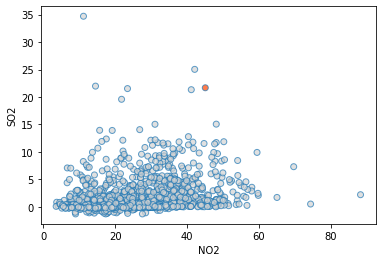

In [5]:
houston_pollution = df[df.city == 'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day == 330) & (year == 2014) else 'lightgray' 
                  for day, year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

### Highlight a point based upon its value for some variable not displayed

Look at the behavior of NO2 & SO2 when the un-plotted O3 value was at its highest.

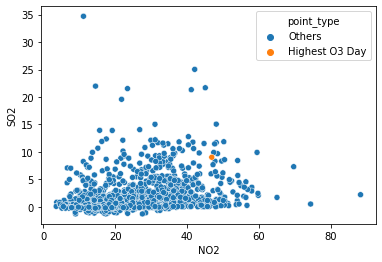

In [6]:
houston_pollution = df[df.city == 'Houston'].copy()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3 == houston_pollution.O3.max() else 'Others' 
                                   for O3 in houston_pollution.O3]

# sns.scatterplot() can take a non-color vector as its 'hue' argument and automatically color the points 
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()

the highest O3 day fell in the upper (but not highest) values of NO2 & SO2; a potentially weak interaction between O3 and the other variables

### Use annotation

Basic text annotation

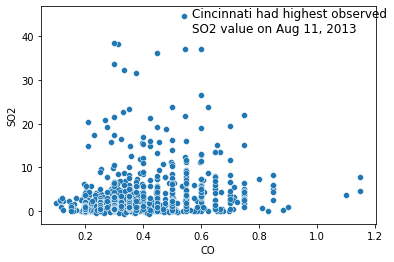

In [7]:
# Data for just August
sns.scatterplot(x = 'CO', y = 'SO2', data = df[df.month == 8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,  # Draw annotation at x = 0.57 & y = 41
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         fontdict = {'ha': 'left', 'size': 'large'})  # Set the font to large
plt.show()

Annotation with arrow

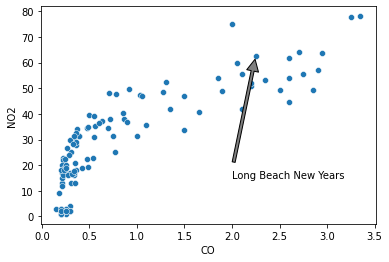

In [8]:
# Query and filter to New Years in Long Beach
jan_pollution = df.query('(month == 1) & (year == 2012)')
lb_newyears = jan_pollution.query('(city == "Long Beach") & (day == 1)')

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),  # Set arrow endpoint
             xytext = (2, 15),                        # Place text at x = 2 & y = 15
             arrowprops = {'facecolor': 'gray', 'width': 3, 'shrink': 0.03},  # Arrow configuration; shrink arrow to avoid occlusion
             backgroundcolor = 'white')
plt.show()

Long Beach has a smog problem ? Emphasize how Long Beach compares to a set of peer cities; highlight Long Beach and draw attention to a particularly bad day.

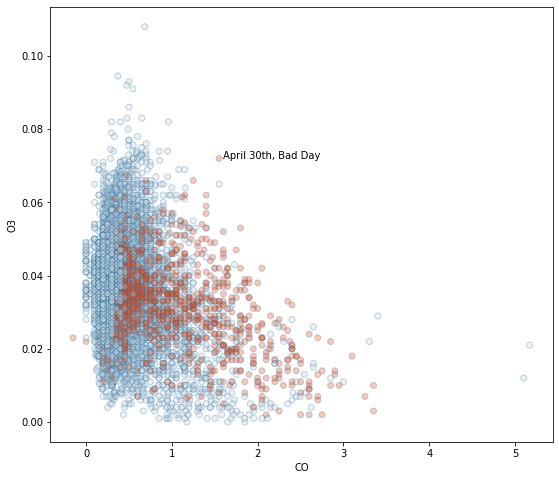

In [9]:
# Make a vector where Long Beach is orangered, else lightgray
is_lb = ['orangered' if city == 'Long Beach' else 'lightgray' for city in df['city']]

fig = plt.figure(figsize=(9,8))

sns.regplot(x = 'CO',
            y = 'O3',
            data = df,
            fit_reg = False,
            scatter_kws = {'facecolors': is_lb, 'alpha': 0.3})  # Map facecolors to is_lb and set opacity

# Add annotation at x = 1.6 & y = 0.072
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

### Comparing gourps

Compare the general pattern of O3 for 2012 to all other years on record.

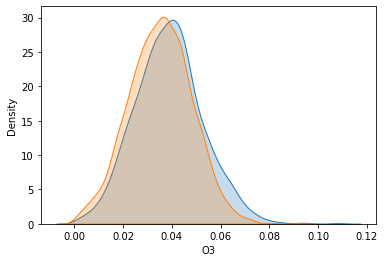

In [10]:
sns.kdeplot(df[df.year == 2012].O3, 
            shade = True, # Shade under kde
            label = '2012')

sns.kdeplot(df[df.year != 2012].O3, 
            shade = True,
            label = 'other years')
plt.show()

Since there is much less data contributing to the shape of the Vandenberg plot, improve KDEs with the addition of a rug plot - little dashes drawn beneath the density that show precisely where each data point falls.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


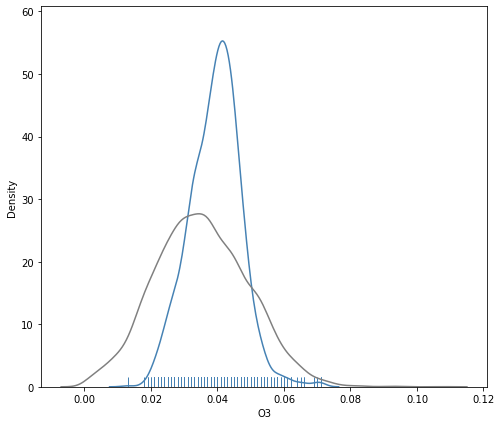

In [11]:
fig = plt.figure(figsize=(8,7))
sns.distplot(df[df.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             hist = False,  # Turn of the histogram
             color = 'steelblue', 
             rug = True)    # Turn on rugplot

sns.distplot(df[df.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             hist = False,  
             color = 'gray')
plt.show()

Rug plots help see those gaps that you may have otherwise assumed were filled with data. Here shows that there is a small, but not neglible gap, in the data around O3 = 0.065.

### Compare a bunch of classes to each other

Look at Ozone levels for all cities for the month of March.

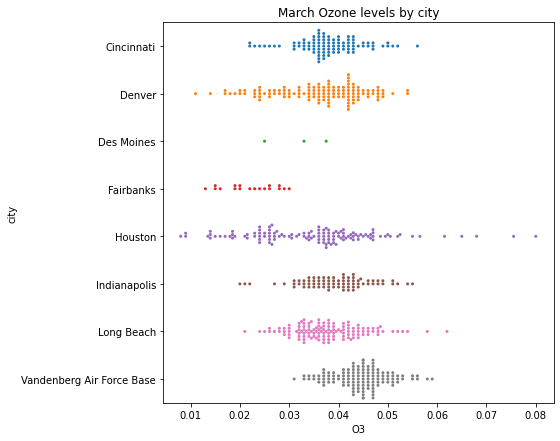

In [12]:
pollution_mar = df[df.month == 3]

fig = plt.figure(figsize=(7,7))

# Plot beeswarm with x as O3
sns.swarmplot(y = 'city',
              x = 'O3', 
              data = pollution_mar, 
              # Decrease point size to avoid crowding 
              size = 3)

plt.title('March Ozone levels by city')
plt.show()

Vandenberg on average has high O3 levels in March. However, Houston has a much wider range and can sometimes reach much higher levels. Additionally, Des Moines and Fairbanks have far fewer observations than the other sites.